# <center> Machine Learning Techniques Applied to Power Data </center>


<center> Ontario's Electricity Market Data </center>
<center> . </center>
<center> All data used for this project is publicly available and can be </center>
<center> accessed through Ontario's Independent Electricity System Operator's website </center>

<center> . </center>
<center> For more information please click on > <a href='https://www.ieso.ca/power-data'> ieso.ca </a> </center>

notebook by: Behrouz ShakeriFard

contact: bshakeri@torontomu.ca

Jan 2024

<hr>

## A Few Words About the Project


This project is a simple approach to utilizing basic Machine Learning algorithms (Logistic Regression, Decision Trees, Random Forests, and XGBoost) in order to predict price spikes in the electricity market.

There are commercial uses for a project like this. For example, any building (residential or commercial) equipped with a WiFi-capable Microcontroller Unit (MCU) and a sufficiently large energy storage unit (such as lithium-ion batteries) can use this model to *automatically* connect or disconnect from the grid, and thus, avoid electricity consumption from the grid as prices spike. This can reduce electricity cost for the consumer. Think of it as a smart electricity management system that reads data from the local system operator, makes a prediction, and follows that with a decision.

Technical questions regarding the best practices for setting up the network connections for this kind of Internet of Things (IoT) devices (which, in this case, are also using Artificial Intelligence) are worth investigating. However, that would be beyond the scope of this notebook. 

#### Who is this notebook for?
Throughout this notebook, I will try to use casual language. The purpose is to make this project easy to understand and easy to follow. There is a trade-off, however. Some of the things that will be explained here, might seem too obvious for more advanced users. This, will inevitably make the notebook a bit longer. So, feel free to skip over large boxes of words if you are an experienced Machine Learning professional, and follow along with graphs.

#### Your level of experience and theoretical knowledge

I will move forward with the assumption that you have some familiarity with basic Machine Learning algorithms. The purpose of this notebook is to show:

1. how we can explore a clean data set, and make sense of it;

2. to present a simple but useful application for a few Machine Learning algorithms that are relatively easy-to-understand and readily available for use, with the right data set.

This project has been broken down into several notebooks (EDA, Feature Engineering, Modelling), and it is best suited for:

1. those who have earned an undergrad degree in the fields of Mathematics, Statistics, or Economics;
2. those enrolled in (or graduated from) Computer Science programme;
3. those enrolled in (or graduated from) a graduate level quantitative field (such as economics);
4. and PhD level students with understanding of scientific methods, with emphasis on empirical work which envolves data, regression analysis, cause and effect investigation, causal inference, etc. 

<hr>

## Introduction:
Ontario's Independent Electricity Systems Operator (IESO) records key variables of Ontario's electricity system, and this data is available in CSV format for anyone who is interested. These variables include hourly prices, hourly demand, hourly output, capacity for generation, and more. 

For the first step (which would be data cleaning, a must-do before Exploratory Data Analysis or EDA) we will import one year worth of data. And everything that we need, can be found in three files:

- Ontario and Market Demand
- Hourly Ontario's Electricity Price (HOEP)
- Generator Output and Capacity (GOC)

These files can be found here: <a> https://www.ieso.ca/en/Power-Data/Data-Directory </a>


Before getting started with the data we need to import a few useful python packages.

In [92]:
import numpy as np
import pandas as pd

# <center> Demand </center>

<center> After downloading the CSV file from IESO website, we will use Pandas library to load the data. </center>


In [93]:
# load the data and store it in memory, in form of a dataframe
d_2021 = pd.read_csv('PUB_Demand_2021_v396.csv')

In [94]:
# sanity check for the dataframe
d_2021.head()

,\\Hourly Demand Report,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,\\Created at 2022-01-31 07:30:06,NaN,NaN,NaN
1,\\For 2021,NaN,NaN,NaN
2,Date,Hour,Market Demand,Ontario Demand
3,2021-01-01,1,16057,14112
4,2021-01-01,2,15516,13504


In [95]:
# Let's check out the shape of our dataframe
d_2021.shape

(8763, 4)

In [96]:
# seeing the very end of the dataframe
d_2021.tail()

,\\Hourly Demand Report,Unnamed: 1,Unnamed: 2,Unnamed: 3
8758,2021-12-31,20,17315,16046
8759,2021-12-31,21,16629,15529
8760,2021-12-31,22,16010,15112
8761,2021-12-31,23,15362,14596
8762,2021-12-31,24,15227,14070


Cool. Looks like we have 8760 data points, representing the 24 hours in each of the 365 days, in a full year. Let's double check:

In [97]:
365* 24

8760

Sweet! Now let's do a little clean up!

<hr>

#### [Task]:
By removing the top three rows and renaming the columns, we can make our dataframe look more clean and tidy; and crucially, more usable!

In [98]:
# dropping top three rows 
d_2021.drop([0,1,2], inplace = True)

In [99]:
# renaming columns
d_2021.columns=['Date', 'Hour','Market Demand','Ontario Demand']

In [100]:
# sanity check
d_2021.head()

,Date,Hour,Market Demand,Ontario Demand
3,2021-01-01,1,16057,14112
4,2021-01-01,2,15516,13504
5,2021-01-01,3,15185,13155
6,2021-01-01,4,14940,12892
7,2021-01-01,5,14802,12798


In [101]:
# sanity check
d_2021.tail()

,Date,Hour,Market Demand,Ontario Demand
8758,2021-12-31,20,17315,16046
8759,2021-12-31,21,16629,15529
8760,2021-12-31,22,16010,15112
8761,2021-12-31,23,15362,14596
8762,2021-12-31,24,15227,14070


All is well!

<hr>

## Data Types

It is important to check out the data types before we actually engage in any serious operation.

In [102]:
d_2021.dtypes

Date              object
Hour              object
Market Demand     object
Ontario Demand    object
dtype: object

The data types are all wrong. We need to:
1. convert the Market Demand and Ontario Demand into numeric data;
2. combine the 'Date' and 'Hour' columns into one column, with 'datetime' format, and set it as index.

In [103]:
# converting the two 'Market Demand' and ' Ontario Demand' columns to numeric data type
d_2021['Market Demand'] = d_2021['Market Demand'].apply(pd.to_numeric)
d_2021['Ontario Demand'] = d_2021['Ontario Demand'].apply(pd.to_numeric)

In [104]:
d_2021.dtypes

Date              object
Hour              object
Market Demand      int64
Ontario Demand     int64
dtype: object

Cool! Now we can move on to the next step.

<hr>

#### [Plan]:
We can make things look even more tidy and clean by combining the 'Date' and 'Hour' columns, and creating a date-time column, then setting it to be the index.

<ol>
<li> Regarding the 'Hour' column, we can convert this format to time-stamp format; </li>
<li> Then, we can combine the time-stamp column and date column, into a single date-time column; </li>
<li> Next, we can change the data-type to 'datetime' and set the new date-time column as the index. </li>
</ol>

This should make our dataframe much easier to handle by the computer (less memory intensive).
Let's begin with converting 'Hour' column to a more usable data type.

<hr>

#### [Task]:

There is a small problem: our HOUR data, needs to be in double digit format in a consistent way. Meaning, we need a LEADING ZERO for single digit values.

In [105]:
# addng the LEADING Zero to the single digit values
d_2021['Hour'] = d_2021['Hour'].astype(str).str.zfill(2)

In [155]:
# Let's see whether it has worked, or not.
# use either 21 or 87
d_2021.sample(7, random_state=87)

,Market Demand,Ontario Demand
datetime_data,,
2021-02-22 12:00:00,19554,18073
2021-10-21 05:00:00,14417,12117
2021-12-16 06:00:00,15899,13211
2021-07-23 05:00:00,14574,12388
2021-11-19 02:00:00,15656,13077
2021-09-18 14:00:00,16347,15213
2021-02-04 11:00:00,18828,16460


Cool. But now we have a new problem! There is no '24' in the accepted integers which can represent HOUR of the day! So, we need to fix this issue.

<hr>

#### [Task]:

Before we convert the 'Hour' column into a datetime format, we need to replace all '24' values with '00'. 

Otherwise, the datetime format will have trouble dealing with 24:00:00 and will through an error, and refuse to complete the process!

In [107]:
replacement_number = '00'
d_2021['Hour'] = d_2021['Hour'].replace('24', replacement_number)

In [108]:
# sanity check
d_2021.sample(7, random_state=32)

,Date,Hour,Market Demand,Ontario Demand
6334,2021-09-21,20,18703,17572
5602,2021-08-22,08,17154,15248
911,2021-02-07,21,20195,18224
1250,2021-02-21,00,17389,15024
7492,2021-11-09,02,14348,12379
2986,2021-05-05,08,16427,14617
6330,2021-09-21,16,19402,17678


Cool! We have fixed the issue.

Now, Let's change the format into something that represents time of the day.

<hr>

#### [Task]:

Changing the 'Hour' column's format to "HH:MM:SS".

In [109]:
# adding the minute and second pace holder
d_2021['Hour'] = d_2021['Hour'] + ':00:00'

In [110]:
# sanity check
d_2021.sample(13, random_state=13)

,Date,Hour,Market Demand,Ontario Demand
7046,2021-10-21,12:00:00,17585,15422
6002,2021-09-07,00:00:00,15602,13500
2279,2021-04-05,21:00:00,16205,14968
964,2021-02-10,02:00:00,17539,15395
7551,2021-11-11,13:00:00,17024,15153
2107,2021-03-29,17:00:00,16115,15110
6383,2021-09-23,21:00:00,16453,14804
7612,2021-11-14,02:00:00,14968,12608
5276,2021-08-08,18:00:00,21396,19571
1786,2021-03-16,08:00:00,20093,17592


This is so much better!

Now we can add our 'Date' column to our 'Hour' column, and save the result in a new column.

In [111]:
# Combine 'Date' and 'Hour' into a single datetime column
d_2021['new datetime'] = d_2021['Date'].astype(str) + ' ' + d_2021['Hour'].astype(str)

In [112]:
# sanity check
d_2021.sample(5)

,Date,Hour,Market Demand,Ontario Demand,new datetime
886,2021-02-06,20:00:00,19989,18409,2021-02-06 20:00:00
4086,2021-06-20,04:00:00,13573,11496,2021-06-20 04:00:00
8544,2021-12-22,22:00:00,20466,18274,2021-12-22 22:00:00
3272,2021-05-17,06:00:00,14172,12571,2021-05-17 06:00:00
7274,2021-10-30,00:00:00,13879,12306,2021-10-30 00:00:00


In [113]:
# changing the data type of our new column
d_2021['datetime_data'] = pd.to_datetime(d_2021['new datetime'], format='%Y-%m-%d %H:%M:%S')

In [114]:
# Set the new datetime column as the index
d_2021.set_index('datetime_data', inplace=True)

# Drop the original 'Date' and 'Hour' columns if needed
d_2021 = d_2021.drop(['Date', 'Hour', 'new datetime'], axis=1)

In [115]:
# sanity check 
d_2021.dtypes

Market Demand     int64
Ontario Demand    int64
dtype: object

Cool! We have accomplished our goal. Our dataframe looks pretty good!

In [116]:
d_2021.shape

(8760, 2)

Not only we have simplified and cleaned our dataset, we have also significantly reduced the space that our dataframe was occupying on our computer's memory!

Let's check out how much reduction (memory space required) we have managed to accomplish.

<hr>

#### [Task]:

Showing the space required on our computer's memory for holding this dataframe.

In [117]:
# Display the total memory usage of the DataFrame
total_memory_usage = d_2021.memory_usage(deep=True).sum()
print("\nTotal memory usage of the DataFrame:", total_memory_usage, "bytes")


Total memory usage of the DataFrame: 210240 bytes


<hr>

Very cool.

Let's check out the original size of the imported data, and make a comparison.

In [118]:
raw_data = pd.read_csv('PUB_Demand_2021_v396.csv')

# Display the total memory usage of the raw DataFrame
total_memory_usage = raw_data.memory_usage(deep=True).sum()
print("\nTotal memory usage of the DataFrame:", total_memory_usage, "bytes")


Total memory usage of the DataFrame: 2187454 bytes


### [Accomplishment]:

Not only our dataframe looks much more clean, tidy, and neat; but also, we are now ONE TENTH of the space which was previously required, while working with this dataframe!

<hr>

## More About Our Cleaned Dataframe

In [119]:
d_2021.shape

(8760, 2)

We have TWO columns and 8760 rows.

Our index is providing us with date and hour. 

The next column, 'Market Demand' represents the total energy that was supplied from the IESO-administered market. The IESO calculates total market demand by summing all output from generators registered in the market plus all scheduled imports to the province.

The last column, 'Ontario Demand' represents the  sum of all loads within Ontario which is supplied from the market, plus all line losses incurred on the IESO-controlled grid.

### Missing Values 

Next, we will check for NAN, missing values or any other possible problems.

In [120]:
# checking for NAN or null values
d_2021.isnull().sum()

Market Demand     0
Ontario Demand    0
dtype: int64

In [121]:
# checking for duplicate values
d_2021.duplicated().sum()

1

This is a very clean dataframe.

<hr>

Before moving on, let's take a quick look at our data!

In [145]:
d_2021.describe()

,Market Demand,Ontario Demand
count,8760.000000,8760.000000
mean,17192.678082,15279.019406
std,2200.862573,2303.635847
min,12569.000000,10426.000000
25%,15542.000000,13592.750000
50%,16936.000000,15116.000000
75%,18657.500000,16780.250000
max,24609.000000,22986.000000


And one quick graph for the sake of visualization!

In [147]:
# implementing the pivot
pivot_demand = d_2021.pivot_table(index=d_2021.index.date,columns=d_2021.index.time,values="Ontario Demand")

Text(0.5, 1.0, 'Annual Average Demand - expressed in a 24-hr cycle')

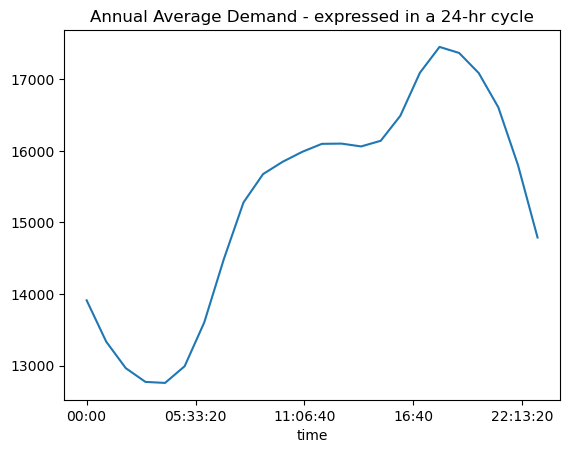

In [157]:
# this graph shows the average price of electricity during the 24-hour cycle, using 
# the 8760 data points, reflecting 365 days of the year.
pivot_demand.mean().plot()

# We can give it a title
plt.title('Annual Average Demand - expressed in a 24-hr cycle')

## Siginificant Deviations from the Mean

In [150]:
demand_deviations = pivot_demand - pivot_demand.mean()

<Axes: title={'center': 'Heatmap showing deviations from the mean - demand spikes red'}>

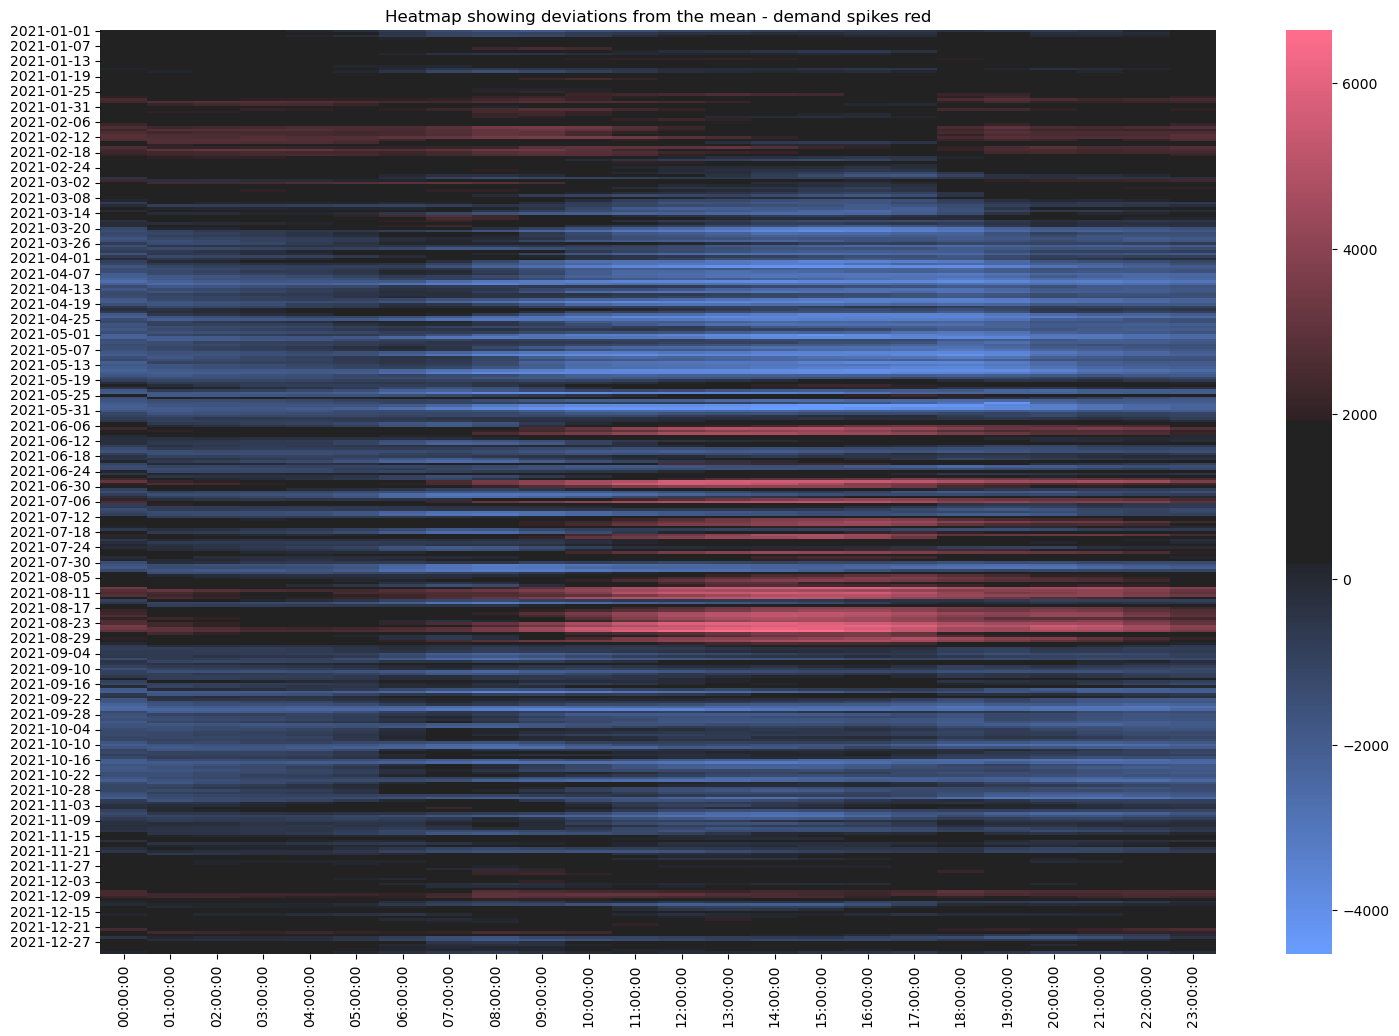

In [158]:
# Set the size of the graph
plt.figure(figsize=(18,12))

# color gradient
cmap = sns.diverging_palette(255, 2, s=100, l=65, sep=40, center="dark", as_cmap=True)

# title of the graph
plt.title('Heatmap showing deviations from the mean - demand spikes red')

# Produce the Seaborn Heat Map
sns.heatmap(demand_deviations, cmap = cmap)

Very cool! Let's move on to our next piece of data!

<hr>

# <center> Price </center>

Hourly Ontario Energy Price (HOEP) is set by the system operator, in this case, Ontario's Independent System Operator, or IESO.

Price is a numeric variable that reflects the market fluctuations. As demand fluctuates, energy producers (generators) chase market demand. IESO ensures that generators have sufficient incentive to enter the market when demand is high, by increasing the price, and thus, bringing sufficient incentive to the market for producers (generators) to start producing electricity.

The exact mechanism through which IESO sets the price is not discussed in this notebook, and is of no interest. Because the objective is to predict price without any knowledge of that mechanism. In other words, the aim of this project is to predict price, an hour from now, in the absence of any knowledge regarding how IESO sets the price.

Now let's start looking at some data.


In [122]:
# importing the file that was downloaded from IESO website
pr_2021 = pd.read_csv('PUB_PriceHOEPPredispOR_2021.csv')

In [123]:
# sanity check
pr_2021.head()

,\\Yearly HOEP OR Predispatch Report,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,\\Created at 2022-01-31 08:02:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,\\For 2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Date,Hour,HOEP,Hour 1 Predispatch,Hour 2 Predispatch,Hour 3 Predispatch,OR 10 Min Sync,OR 10 Min non-sync,OR 30 Min
3,2021-01-01,1,31.74,20.69,20.33,14.89,1.36,0.23,0.23
4,2021-01-01,2,17.61,20.45,19.03,14.36,1.28,0.20,0.20


Looks good!

We can remove the first two rows because they contain no useful information.

In [124]:
# dropping top two rows 
pr_2021.drop([0,1], inplace = True)

### A few words about the market
Demand and supply rarely meet in the electricity systems. This is why operating reserves (stand-by resource that is available to be dispatched in short notice, in order to meet demand, should an unanticipated event take place in the real-time energy market) are important. More information about Operating Reserves may be accessed here: <a> https://www.ieso.ca/en/Sector-Participants/Market-Operations/Markets-and-Related-Programs/Operating-Reserve-Markets </a>

For this analysis, we are interested in HOEP. However, it is worth bearing in mind that the operating reserve (10 min Synched) might be a good forward indicator of possible price spikes in the electricity market. We might use this column in the future. For now, however, we will only keep Date, Hour, and HOEP (Hourly Electricity Price), for the sake of simplicity.

In [125]:
# let's remove the unnecessary columns
pr_2021 = pr_2021.drop(pr_2021.columns[[3,4,5,6,7,8]], axis=1) 

In [126]:
# sanity check
pr_2021.head(3)

,\\Yearly HOEP OR Predispatch Report,Unnamed: 1,Unnamed: 2
2,Date,Hour,HOEP
3,2021-01-01,1,31.74
4,2021-01-01,2,17.61


Cool. Now we can remove the top row and rename our columns!

In [127]:
# renaming columns
pr_2021.columns=['Date','Hour','HOEP']

In [128]:
# dropping the top row
pr_2021.drop([2], inplace = True)

In [129]:
#sanity check
pr_2021.head(3)

,Date,Hour,HOEP
3,2021-01-01,1,31.74
4,2021-01-01,2,17.61
5,2021-01-01,3,14.36


#### [Task]:

<ol>
    <li> Change the 'Hour' column to double digit format, with leading zero;</li>
    <li> Change the format from 'dd' to 'hh:mm:ss' format;</li>
    <li> Concatenate the 'Date' column and 'Hour' column, and create a new column; </li>
    <li> Change the data-type of the new column, from string (object) to datetime type;</li>
    <li> Set it as index;</li>
    <li> Change the 'HOEP' data type to numeric.</li>
</ol>

In [130]:
# addng the LEADING Zero to the single digit values
pr_2021['Hour'] = pr_2021['Hour'].astype(str).str.zfill(2)

In [131]:
replacement_number = '00'
pr_2021['Hour'] = pr_2021['Hour'].replace('24', replacement_number)

In [132]:
# adding the minute and second pace holder
pr_2021['Hour'] = pr_2021['Hour'] + ':00:00'

In [133]:
# Combine 'Date' and 'Hour' into a single datetime column
pr_2021['new datetime'] = pr_2021['Date'].astype(str) + ' ' + pr_2021['Hour'].astype(str)

In [134]:
# changing the data type of our new column
pr_2021['datetime_data'] = pd.to_datetime(pr_2021['new datetime'], format='%Y-%m-%d %H:%M:%S')

In [135]:
# Set the new datetime column as the index
pr_2021.set_index('datetime_data', inplace=True)

In [136]:
# Drop the original 'Date' and 'Hour' columns if needed
pr_2021 = pr_2021.drop(['Date', 'Hour', 'new datetime'], axis=1)

In [137]:
pr_2021.head()

,HOEP
datetime_data,
2021-01-01 01:00:00,31.74
2021-01-01 02:00:00,17.61
2021-01-01 03:00:00,14.36
2021-01-01 04:00:00,10.26
2021-01-01 05:00:00,6.03


In [138]:
# shape of our dataframe
pr_2021.shape

(8760, 1)

In [139]:
# converting our hourly price column to numeric
pr_2021['HOEP'] = pr_2021['HOEP'].apply(pd.to_numeric)

In [140]:
# data types
pr_2021.dtypes

HOEP    float64
dtype: object

Very Cool. 

In only seven steps, we have achieved quite a lot! Let's check the size of our dataframe.

In [141]:
# Display the total memory usage of the DataFrame
total_memory_usage = pr_2021.memory_usage(deep=True).sum()
print("\nTotal memory usage of the DataFrame:", total_memory_usage, "bytes")


Total memory usage of the DataFrame: 140160 bytes


In [142]:
raw_data = pd.read_csv('PUB_PriceHOEPPredispOR_2021.csv')

# Display the total memory usage of the raw DataFrame
total_memory_usage = raw_data.memory_usage(deep=True).sum()
print("\nTotal memory usage of the DataFrame:", total_memory_usage, "bytes")


Total memory usage of the DataFrame: 4871962 bytes


We have reduced the size of our dataframe from more than 4.5 MB to 140 KB. Albeit, we have discarded a significant chunk of our data! We suspect the discarded data was of little value!

<hr>

## More Cleaning!

#### Missing Values

In [86]:
# checking for NAN or null values
pr_2021.isnull().sum()

HOEP    0
dtype: int64

We don't have missing values. That's good!

<hr>

Before we move on to the next piece of data, let's take a quick look at our price distribution.

In [89]:
pr_2021.describe()

,HOEP
count,8760.000000
mean,26.747627
std,31.228770
min,-3.940000
25%,10.950000
50%,24.050000
75%,38.670000
max,1660.800000


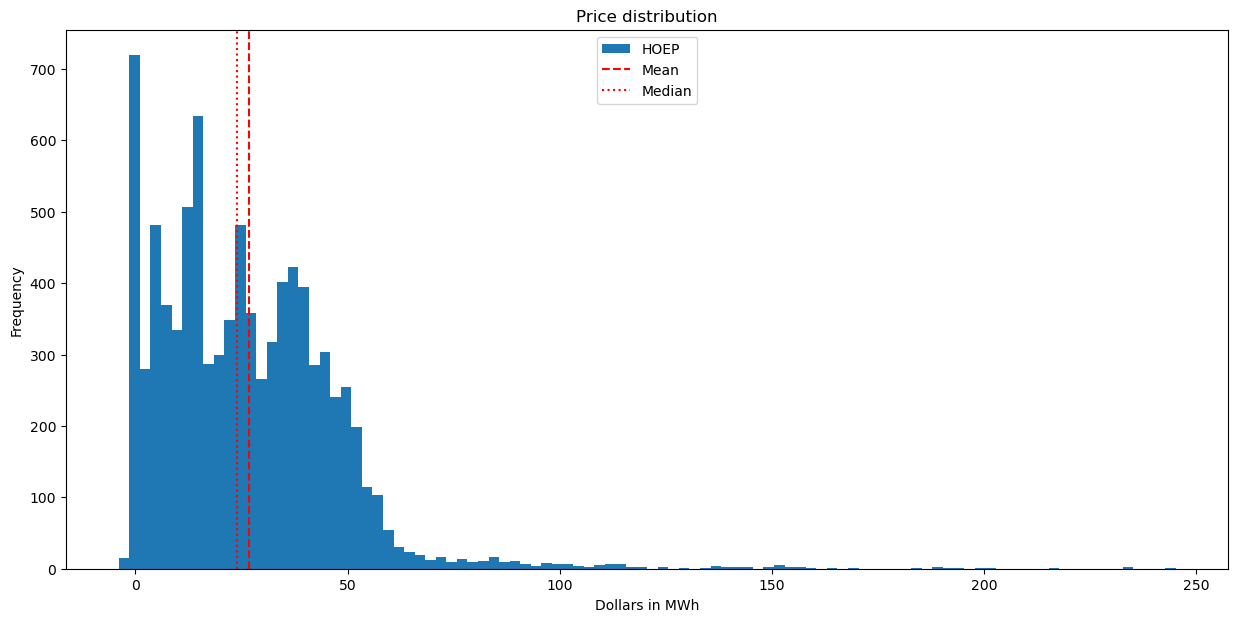

In [144]:
# First let's filter all price values above 250
filtered_prices = pr_2021[pr_2021['HOEP'] <=250 ]

# initiate the plot and setting the size
plt.figure(figsize=(15,7))

# specifying the data column and plot details
filtered_prices['HOEP'].plot(kind='hist', bins=100)

# let's get the mean and median values
mean_value = pr_2021['HOEP'].mean()
median_value = pr_2021['HOEP'].median()

# Add vertical lines for mean and median
plt.axvline(mean_value, color='red', linestyle='--', label='Mean')
plt.axvline(median_value, color='red', linestyle=':', label='Median')

# x-axis title
plt.xlabel('Dollars in MWh')

#title for the plot
plt.title('Price distribution')

# add a legend
plt.legend(loc='upper center')

# show the plot
plt.show()

Very Cool! 

Let's move on to our next piece of data!

<hr>


# <center> Generator Output and Capacity </center>

We have looked at demand and price. Next, we will look at supply of electricity to the market.

Generator Output and Capacity data provides close-to-real-time output levels for Ontario’s generators
registered as a market participant, and their capacity to produce. It is published
hourly, as soon as the data is available, containing data from generators with
capacities 20 MW or greater, registered with the IESO. For this analysis we are using the same year data (2018), available as excel sheets. 

More information is available here: http://reports.ieso.ca/docrefs/helpfile/GenOutputCapability_h4.pdf



In [204]:
clear

In [205]:
clear

In [206]:
clear

In [179]:
ls

'2023_06_03 Game of Life.ipynb'*
'2023_07_05 Game_practive_01.ipynb'*
'2024_01 IESO ML model - notebook one EDA - d_2021.ipynb'
'Capstone Revisited 2023 notebook experimental 2023_06_19 features.ipynb'*
'Capstone Revisited 2023 notebook one IESO EDA.ipynb'*
'Capstone revisited 2023 notebookTwo 2023_06_18.ipynb'*
 Data_Cleaning_Guide.txt
'Elec Market model 0.1c - April03.ipynb'*
'Elec Market model 0.2 Regression - April_11.ipynb'*
'Energy Storage Optimization v1.1.ipynb'*
'Energy Storage Optimization v1.2.ipynb'*
 GOC-2018.xlsx*
 IESO-ML/
'IESO_ML 01 Data Cleaning 2024.ipynb'
 PUB_Demand_2017_v1.csv*
 PUB_Demand_2018_v1.csv*
 PUB_Demand_2020_v396.csv
 PUB_Demand_2021_v396.csv
 PUB_Demand_2022_v397.csv
 PUB_GenOutputCapabilityMonth_202101.csv
 PUB_GenOutputCapabilityMonth_202102.csv
 PUB_GenOutputCapabilityMonth_202103.csv
 PUB_PriceHOEPPredispOR_2017.csv*
 PUB_PriceHOEPPredispOR_2018.csv*
 PUB_PriceHOEPPredispOR_2019.csv*
 PUB_PriceHOEPPredispOR_2020.csv*
 PUB_PriceHOEPPredispOR_2021.cs

<hr>

## Loading the Data

The source of our data (Independent Electricity System Operator) offers one CSV file for each month. This CSV file contains hourly data, for each of the generators commissioned in Ontario (most populous province in Canada), for each day in the month.

If you wish to download and look at the data yourself, you can find them here: <a href="http://reports.ieso.ca/public/GenOutputCapabilityMonth/"> http://reports.ieso.ca/public/GenOutputCapabilityMonth/ </a>

So, there are 12 CSV files for the year 2021. Let's take a quick look at the structure of our data.

In [239]:
# Loading the data
GOC_2021_01 = pd.read_csv('PUB_GenOutputCapabilityMonth_202101.csv', skiprows=3)

In [240]:
# Getting the shape of our dataframe
GOC_2021_01.shape

(12896, 28)

In [241]:
# Checking out our columns
GOC_2021_01.columns

Index(['Generator', 'Fuel Type', 'Measurement', 'Hour 1', 'Hour 2', 'Hour 3',
       'Hour 4', 'Hour 5', 'Hour 6', 'Hour 7', 'Hour 8', 'Hour 9', 'Hour 10',
       'Hour 11', 'Hour 12', 'Hour 13', 'Hour 14', 'Hour 15', 'Hour 16',
       'Hour 17', 'Hour 18', 'Hour 19', 'Hour 20', 'Hour 21', 'Hour 22',
       'Hour 23', 'Hour 24', 'Unnamed: 27'],
      dtype='object')

Very cool!

We have DATES, NAME of the Generator, FUEL TYPE, and HOURLY figures. Now, Let's check out the rows.

In [236]:
# Checking out rows
GOC_2021_01.index

Index(['2021-01-01', '2021-01-01', '2021-01-01', '2021-01-01', '2021-01-01',
       '2021-01-01', '2021-01-01', '2021-01-01', '2021-01-01', '2021-01-01',
       ...
       '2021-01-31', '2021-01-31', '2021-01-31', '2021-01-31', '2021-01-31',
       '2021-01-31', '2021-01-31', '2021-01-31', '2021-01-31', '2021-01-31'],
      dtype='object', length=12896)

very cool!

As expected, we have dates expressed in this format YYYY-mm-dd. Let's find out the number of generators!

In [356]:
# we will divide the number of rows by 31 - which is the number of days in each month
12896 / 31

416.0

## Note:

It is difficult to believe that there are 416 power generators in Ontario! Let's do a quick 'GroupBy' and double check.

In [242]:
GOC_2021_01.groupby(GOC_2021_01.index).count()

,Generator,Fuel Type,Measurement,Hour 1,Hour 2,Hour 3,Hour 4,Hour 5,Hour 6,Hour 7,...,Hour 16,Hour 17,Hour 18,Hour 19,Hour 20,Hour 21,Hour 22,Hour 23,Hour 24,Unnamed: 27
2021-01-01,416,416,416,416,416,416,416,416,416,416,...,416,416,416,416,416,416,416,416,416,0
2021-01-02,416,416,416,416,416,416,416,416,416,416,...,416,416,416,416,416,416,416,416,416,0
2021-01-03,416,416,416,416,416,416,416,416,416,416,...,416,416,416,416,416,416,416,416,416,0
2021-01-04,416,416,416,416,416,416,416,416,416,416,...,416,416,416,416,416,416,416,416,416,0
2021-01-05,416,416,416,416,416,416,416,416,416,416,...,416,416,416,416,416,416,416,416,416,0
2021-01-06,416,416,416,416,416,416,416,416,416,416,...,416,416,416,416,416,416,416,416,416,0
2021-01-07,416,416,416,416,416,416,416,416,416,416,...,416,416,416,416,416,416,416,416,416,0
2021-01-08,416,416,416,416,416,416,416,416,416,416,...,416,416,416,416,416,416,416,416,416,0
2021-01-09,416,416,416,416,416,416,416,416,416,416,...,416,416,416,416,416,416,416,416,416,0
2021-01-10,416,416,416,416,416,416,416,416,416,416,...,416,416,416,416,416,416,416,416,416,0


There are 416 entries for each day. However, these may not be unique generators. Let's investigate further, and find out how many UNIQUE generators are ACTIVE in Ontario.

## Generators

In [252]:
# unique values in the 'generator' column
GOC_2021_01['Generator'].unique()

array(['ABKENORA', 'ADELAIDE', 'AGUASABON', 'ALEXANDER', 'AMARANTH',
       'AMHERST ISLAND', 'APIROQUOIS', 'ARMOW', 'ARNPRIOR', 'ATIKOKAN-G1',
       'AUBREYFALLS', 'BARRETT', 'BECK1', 'BECK2', 'BECK2 PGS',
       'BELLE RIVER', 'BLAKE', 'BORNISH', 'BOW LAKE', 'BOW LAKE 2',
       'BRIGHTON BEACH', 'BRUCEA-G1', 'BRUCEA-G2', 'BRUCEA-G3',
       'BRUCEA-G4', 'BRUCEB-G5', 'BRUCEB-G6', 'BRUCEB-G7', 'BRUCEB-G8',
       'CALSTOCKGS', 'CAMERONFALLS', 'CANYON', 'CARDINAL', 'CARIBOUFALLS',
       'CARMICHAEL', 'CEDAR POINT 2', 'CHATSFALLS', 'CHENAUX', 'CLERGUE',
       'COMBER', 'CRYSLER', 'DA WATSON', 'DARLINGTON-G1', 'DARLINGTON-G2',
       'DARLINGTON-G3', 'DARLINGTON-G4', 'DECEWFALLS', 'DECEWND1',
       'DESJOACHIMS', 'DESTEC', 'DILLON', 'DOWCHEMICAL', 'DPNTMTLND',
       'EARFALLS', 'EAST LAKE', 'EAST WINDSOR-G1', 'EAST WINDSOR-G2',
       'ERIEAU', 'FORTFRANCSWC', 'GARTSHORE', 'GOSFIELDWGS', 'GOSHEN',
       'GOULAIS', 'GRAND VALLEY 3', 'GRANDSF', 'GRANDWF',
       'GREENFIELD ENERGY CE

In [253]:
# Let's check out the length of this array
len(GOC_2021_01['Generator'].unique())

182

Cool!

We have 182 active generators in Ontario. Now, let's find out more about the structure of our data.

## Measurements

In [256]:
# Let's see what is being measured for each generator
GOC_2021_01.groupby(GOC_2021_01['Generator'])['Measurement'].unique()

Generator
ABKENORA                                [Capability, Output]
ADELAIDE              [Available Capacity, Forecast, Output]
AGUASABON                               [Capability, Output]
ALEXANDER                               [Capability, Output]
AMARANTH              [Available Capacity, Forecast, Output]
                                       ...                  
WINDSOR AIRPORT SF    [Available Capacity, Forecast, Output]
WOLFE ISLAND          [Available Capacity, Forecast, Output]
YORKCGS-G1                              [Capability, Output]
YORKCGS-G2                              [Capability, Output]
ZURICH                [Available Capacity, Forecast, Output]
Name: Measurement, Length: 182, dtype: object

<hr>

Very cool!

Let's look at unique fuel types.

## Fuel Types

In [260]:
# This groupby command helps us see unique fuel types in our data
GOC_2021_01.groupby(GOC_2021_01.index)['Fuel Type'].unique()

2021-01-01    [HYDRO, WIND, BIOFUEL, GAS, NUCLEAR, SOLAR]
2021-01-02    [HYDRO, WIND, BIOFUEL, GAS, NUCLEAR, SOLAR]
2021-01-03    [HYDRO, WIND, BIOFUEL, GAS, NUCLEAR, SOLAR]
2021-01-04    [HYDRO, WIND, BIOFUEL, GAS, NUCLEAR, SOLAR]
2021-01-05    [HYDRO, WIND, BIOFUEL, GAS, NUCLEAR, SOLAR]
2021-01-06    [HYDRO, WIND, BIOFUEL, GAS, NUCLEAR, SOLAR]
2021-01-07    [HYDRO, WIND, BIOFUEL, GAS, NUCLEAR, SOLAR]
2021-01-08    [HYDRO, WIND, BIOFUEL, GAS, NUCLEAR, SOLAR]
2021-01-09    [HYDRO, WIND, BIOFUEL, GAS, NUCLEAR, SOLAR]
2021-01-10    [HYDRO, WIND, BIOFUEL, GAS, NUCLEAR, SOLAR]
2021-01-11    [HYDRO, WIND, BIOFUEL, GAS, NUCLEAR, SOLAR]
2021-01-12    [HYDRO, WIND, BIOFUEL, GAS, NUCLEAR, SOLAR]
2021-01-13    [HYDRO, WIND, BIOFUEL, GAS, NUCLEAR, SOLAR]
2021-01-14    [HYDRO, WIND, BIOFUEL, GAS, NUCLEAR, SOLAR]
2021-01-15    [HYDRO, WIND, BIOFUEL, GAS, NUCLEAR, SOLAR]
2021-01-16    [HYDRO, WIND, BIOFUEL, GAS, NUCLEAR, SOLAR]
2021-01-17    [HYDRO, WIND, BIOFUEL, GAS, NUCLEAR, SOLAR]
2021-01-18    

## NOTE

Cool. We have TWO types of NEW renewable energies (Wind and Solar), and FOUR types of conventional sources of energy (Hydro, Gas, Nuclear, and BioFuel). 

The distinction between these two is important, as we shall see later.

<hr>

One last thing; let's see the first few rows!

In [258]:
# sanity check
GOC_2021_01.head()

,Generator,Fuel Type,Measurement,Hour 1,Hour 2,Hour 3,Hour 4,Hour 5,Hour 6,Hour 7,...,Hour 16,Hour 17,Hour 18,Hour 19,Hour 20,Hour 21,Hour 22,Hour 23,Hour 24,Unnamed: 27
2021-01-01,ABKENORA,HYDRO,Capability,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,NaN
2021-01-01,ABKENORA,HYDRO,Output,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,NaN
2021-01-01,ADELAIDE,WIND,Available Capacity,60,60,60,60,60,60,60,...,60,60,60,60,60,60,60,60,60,NaN
2021-01-01,ADELAIDE,WIND,Forecast,0,0,0,3,7,8,9,...,18,30,42,37,38,22,13,11,7,NaN
2021-01-01,ADELAIDE,WIND,Output,0,0,1,4,1,2,3,...,18,32,43,32,39,17,12,9,7,NaN


very cool!

<hr>

## Structure of our data

So far our investigation has been fruitful and exciting! Let's do a quick review.

<ol>
    <li> We have one month worth of data, which is broken down into days (31 days for January). </li>
    <li> For each day, we have data about 182 unique power generators. In other words, 31 x 182 </li>
    <li> For each of these generators TWO or THREE things are being measured: 
        <ul>
            <li> In case of Hydro, Gas, Biofuel, and Nuclear, we have 'Capability' and 'Output'.</li>
            <li> In case of Wind and Solar (which are considered RENEWABLE sources) we have 'Available Capacity', 'Forecast' and 'Output'.</li>
        </ul>
    </li>
    <li> Next, we have measurements of these variables for each hour.</li>
</ol>

<hr>

In [274]:
# sanity check
GOC_2021_01.groupby(GOC_2021_01.index)['Measurement'].unique().head()

2021-01-01    [Capability, Output, Available Capacity, Forec...
2021-01-02    [Capability, Output, Available Capacity, Forec...
2021-01-03    [Capability, Output, Available Capacity, Forec...
2021-01-04    [Capability, Output, Available Capacity, Forec...
2021-01-05    [Capability, Output, Available Capacity, Forec...
Name: Measurement, dtype: object

<hr>

## Important Note!

Let's discuss 'Available Capacity', 'Forecast' and 'Output'.

### Unique features of Wind and Solar Energy
These two types of energy, produce varied outputs that are beying the control of system operators. Wind output is contingent on the speed of wind; and solar output is contingent on the time of day, angel of the sun, and presence of clouds. Therefore, Available Capacity does not necessarily translate into the full scale of energy being available. Rather, the energy that could be produced (and thus is available) can be reflected in 'Forecast' row, which takes into account conditions that dictate output, and are beyond the control of system operators.

[For more inormation regarding these variables, please read ieso documents: <a href="http://reports.ieso.ca/docrefs/helpfile/GenOutputCapability_h4.pdf"> here </a>]


These notes shall play a crucial role later, when we construct new features.

<hr>

## Plan

We need to have access to the output of the energy market, and include it in our data, alongside Ontario Demand, and Price. Therefore, we need to perform a few operations.

<ol>
    <li> Filter by 'Output' within the 'Measurement' column, </li>
    <li> Sum up all outputs of all of the generators, for each hour, </li>
    <li> Record them as data points (24 of them) within our 'OUTPUT' dataframe, which is yet to be constructed, </li>
    <li> Repeat this operation for each of the 30 or 31 days of each month, </li>
    <li> Repeat this for each of the 12 files, containing the entire annual data.</li>
</ol>

Once this operation is complete, we will also repeat this for another variable (a constructed variable which we will call 'System Capacity'). Thus, by the end of this phase (data cleaning) we should have the following pieces of data:

<ul>
    <li> System's Demand </li>
    <li> System's Output </li>
    <li> System's Capacity </li>
    <li> Prevailing Price for each MWh of electricity </li>
</ul>

Let's get going!

<hr>

## [ Task ]

Create a new dataframe for all the <i> outputs </i>.

In [271]:
# filtering out the output
GOC_output_2021_01 = GOC_2021_01[GOC_2021_01['Measurement'] == 'Output']

In [275]:
# sanity check
GOC_output_2021_01.head()

,Generator,Fuel Type,Measurement,Hour 1,Hour 2,Hour 3,Hour 4,Hour 5,Hour 6,Hour 7,...,Hour 16,Hour 17,Hour 18,Hour 19,Hour 20,Hour 21,Hour 22,Hour 23,Hour 24,Unnamed: 27
2021-01-01,ABKENORA,HYDRO,Output,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,NaN
2021-01-01,ADELAIDE,WIND,Output,0,0,1,4,1,2,3,...,18,32,43,32,39,17,12,9,7,NaN
2021-01-01,AGUASABON,HYDRO,Output,24,2,33,41,17,14,14,...,1,5,34,43,23,22,1,33,12,NaN
2021-01-01,ALEXANDER,HYDRO,Output,33,33,33,33,33,32,32,...,33,33,33,33,33,33,33,33,32,NaN
2021-01-01,AMARANTH,WIND,Output,0,0,0,0,0,0,2,...,96,108,118,99,114,102,61,60,74,NaN


In [276]:
GOC_output_2021_01.shape

(5642, 28)

Let's do a quick calculation. If we divide 5642, by the number of days in January (which is expected to be 31) we should get the number of generators tht are contributing to Ontario's electricity system.

In [277]:
5642 / 31

182.0

We can call this success! 

Very cool. Now, we can move on to the next step: re-organizing  our data (in rows), then setting up a loop, and repeating this process for all of the 12 months for which we have data.

<hr>

## [Task]

<ol>
    <li> Separate days, </li>
    <li> Sum up all of the elements in the column ' Hour 1';</li>
    <li> Put the script in a loop, that would repeat 24 times (for each hour, in a given day); </li>
    <li> Put it inside a loop that would repeat 31 times (for each day in a given month);</li>
</ol>

In [296]:
# accessing dates
GOC_output_2021_01.loc['2021-01-01']

,Generator,Fuel Type,Measurement,Hour 1,Hour 2,Hour 3,Hour 4,Hour 5,Hour 6,Hour 7,...,Hour 16,Hour 17,Hour 18,Hour 19,Hour 20,Hour 21,Hour 22,Hour 23,Hour 24,Unnamed: 27
2021-01-01,ABKENORA,HYDRO,Output,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,NaN
2021-01-01,ADELAIDE,WIND,Output,0,0,1,4,1,2,3,...,18,32,43,32,39,17,12,9,7,NaN
2021-01-01,AGUASABON,HYDRO,Output,24,2,33,41,17,14,14,...,1,5,34,43,23,22,1,33,12,NaN
2021-01-01,ALEXANDER,HYDRO,Output,33,33,33,33,33,32,32,...,33,33,33,33,33,33,33,33,32,NaN
2021-01-01,AMARANTH,WIND,Output,0,0,0,0,0,0,2,...,96,108,118,99,114,102,61,60,74,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-01,WINDSOR AIRPORT SF,SOLAR,Output,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,NaN
2021-01-01,WOLFE ISLAND,WIND,Output,0,5,4,7,10,8,8,...,43,28,31,35,38,15,16,38,32,NaN
2021-01-01,YORKCGS-G1,GAS,Output,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2021-01-01,YORKCGS-G2,GAS,Output,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


# conceptual way of constructing the loop

For day in month:
    for hour in day:
        grab the entire column;
        convert it to numeric (coerce);
        sum them up;
        record the sum as a single value;

# How to access one day worth of data
GOC_output_2021_01.loc['2021-01-01']

# How to grab all of the numeric values in column 'Hour 1'
Hour_01 = pd.to_numeric(GOC_output_2021_01['Hour 1'], errors='coerce')

# sum up all the values you have grabbed
Hour_01.sum()

### Following cells will contain code snipets where I attempt to load and organize the data

This is a preliminary step towards constructing out final script for extracting relevant data.

In [351]:
output_dict = {}

for day in range(1,32):
    day = f"{day:02d}"
    date = '2021-01-' + str(day)
    output_dict[day] = {}
    for hour in range(1,25):
        hour_f = f"{hour:02d}"
        column = 'Hour ' + str(hour)
        value = pd.to_numeric(GOC_output_2021_01.loc[date][column],errors='coerce').sum()
        output_dict[day][hour_f] = value

We can reasonably be confident that it works.

In [353]:
type(output_dict['06']['18'])

numpy.float64

In [354]:
output_dict['06']['18']

19400.0

In [418]:
output_dict.keys()

dict_keys(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31'])

<hr>

## [Task]

Now we need a loop for loading all of our 12 CSV files,
we need to store the number of days in each of the 12 months in an array / list
then we need to construct our dictionary, which will contain our data.

### How to load the Data

### Note

Because of flaws with the raw data, it is important ro add one comma "," at the end of line four; and remove the phrase 'Delivery date' from the beginning of the line. The alternative way of fixing this issue is time consuming and messy.

In [ ]:
### How to load the Data
GOC_2021_01 = pd.read_csv('PUB_GenOutputCapabilityMonth_202101.csv', skiprows=3)

In [ ]:
# This line shows how we can filter out all enteries for which
# the value in Measurement column, is NOT 'Output'
GOC_output_2021_01 = GOC_2021_01[GOC_2021_01['Measurement'] == 'Output']

In [375]:
GOC_output_dict = {}

months = [f"{i:02d}" for i in range(1, 13)]

# With this loop we can load several files
# 12 files which contain the data for 12 months
for month in months:
    GOC_output_dict[month] = {}
    file_name = 'PUB_GenOutputCapabilityMonth_2021' + str(month) + '.csv'
    GOC_df = pd.read_csv(file_name, skiprows=3)
    GOC_df = GOC_df[GOC_df['Measurement'] == 'Output']
    GOC_output_dict[month] = GOC_df

## Note

It is important to take note of the number of days in each month.

In [378]:
days_in_months = [31,28,31,30,31,30,31,31,30,31,30,31]

Now that the data has been loaded, we need to use another loop, go through each day of each month, and each hour of each day, sum up all of the outputs for each hour, and record them as a new variable.

In [ ]:
output_dict = {}

for day in range(1,32):
    day = f"{day:02d}"
    date = '2021-01-' + str(day)
    output_dict[date] = {}
    for hour in range(1,25):
        hour_f = f"{hour:02d}"
        column = 'Hour ' + str(hour)
        value = pd.to_numeric(GOC_output_2021_01.loc[date][column],errors='coerce').sum()
        output_dict[day][hour_f] = value

<hr>

# Loading the data

In [404]:
output_df = pd.DataFrame(columns=['Date','Hour','Output'])

GOC_output_dict = {}

months = [f"{i:02d}" for i in range(1, 13)]
days_in_months = [31,28,31,30,31,30,31,31,30,31,30,31]

for month in months:
    GOC_output_dict[month] = {}
    file_name = 'PUB_GenOutputCapabilityMonth_2021' + str(month) + '.csv'
    GOC_df = pd.read_csv(file_name, skiprows=3)
    GOC_df = GOC_df[GOC_df['Measurement'] == 'Output']

    # Up to this point, we have the monthly data Loaded
    # and we have filtered out Capability, Capacity Available, and forecast
    # All rows contain 'output' variable

    # this variable holds the number of days in a given month
    # for example, 31 for January, 28 for February, etc.
    number_of_days = days_in_months[(int(month) - 1)]

    # now we need to loop through the days of each month
    for day in range(1,number_of_days+1):
        day = f"{day:02d}"
        #month = f"{month:02d}"
        date = '2021-' + str(month) + '-' + str(day)

        # up to this point, everything should work
        for hour in range(1,25):
            hour_f = f"{hour:02d}"
            column = 'Hour ' + str(hour)
            value = pd.to_numeric(GOC_df.loc[date][column],errors='coerce').sum()

            # this line stores the extracted information in a dictionary, to be appended
            values_dict ={ 'Date' : date , 'Hour' : hour_f, 'Output' : value}

            new_df = pd.DataFrame([values_dict])
            output_df = pd.concat( [output_df, new_df] ,ignore_index=True)
                
        
        

### Sanity checks

In [419]:
# sanity check
output_df.shape

(8760, 3)

In [420]:
# sanity check
output_df.columns

Index(['Date', 'Hour', 'Output'], dtype='object')

In [433]:
output_df.head()

,Date,Hour,Output
0,2021-01-01,01,14301.0
1,2021-01-01,02,13786.0
2,2021-01-01,03,13507.0
3,2021-01-01,04,13505.0
4,2021-01-01,05,12881.0


In [421]:
# sanity check
output_df.describe()

,Output
count,8760.000000
mean,16196.016210
std,1911.668516
min,11771.000000
25%,14762.750000
50%,15954.500000
75%,17384.250000
max,22507.000000


very cool. So far our progress has been tremendous, and everything seems to be going remarkably smoothly.

<hr>

## One Last Thing

We should keep the spare capacity in the system, and store it in out final dataframe (the dataframe which will be used later for Exploratory Data Analysis, Hypothesis Testing, Principal Component Analysis, Feature Engineering, and Data Modelling).

So, before we end this phase of project, we will repeat the last step except, instead of filtering out "Capability", "Capacity Available", and "Forecast", this time we will keep the "Capability" and "Forecast". This is important because it allows us to see how can the system respond to demand fluctuations domestically, before the system resorts to importing electricity at an exorbitant cost.

So, Let's get going!

In [448]:
Cap_df = pd.DataFrame(columns=['Date','Hour','Output'])

GOC_Cap_dict = {}

months = [f"{i:02d}" for i in range(1, 13)]
days_in_months = [31,28,31,30,31,30,31,31,30,31,30,31]

for month in months:
    GOC_Cap_dict[month] = {}
    file_name = 'PUB_GenOutputCapabilityMonth_2021' + str(month) + '.csv'
    GOC_df = pd.read_csv(file_name, skiprows=3)

    # This line needs to be modified
    GOC_df = GOC_df[GOC_df['Measurement'].isin(['Forecast','Capability'])]

    # Up to this point, we have the monthly data Loaded
    # and we have filtered out Capability, Capacity Available, and forecast
    # All rows contain 'output' variable

    # this variable holds the number of days in a given month
    # for example, 31 for January, 28 for February, etc.
    number_of_days = days_in_months[(int(month) - 1)]

    # now we need to loop through the days of each month
    for day in range(1,number_of_days+1):
        day = f"{day:02d}"
        #month = f"{month:02d}"
        date = '2021-' + str(month) + '-' + str(day)

        # up to this point, everything should work
        for hour in range(1,25):
            hour_f = f"{hour:02d}"
            column = 'Hour ' + str(hour)
            value = pd.to_numeric(GOC_df.loc[date][column],errors='coerce').sum()

            # this line stores the extracted information in a dictionary, to be appended
            values_dict ={ 'Date' : date , 'Hour' : hour_f, 'capability' : value}

            new_df = pd.DataFrame([values_dict])
            Cap_df = pd.concat( [Cap_df, new_df] ,ignore_index=True)

In [426]:
# sanity check
Cap_df.shape

(8760, 3)

In [502]:
Cap_df.head()

,Date,Hour,Output,capability
0,2021-01-01,01,NaN,26203.0
1,2021-01-01,02,NaN,26494.0
2,2021-01-01,03,NaN,26587.0
3,2021-01-01,04,NaN,26749.0
4,2021-01-01,05,NaN,26843.0


In [503]:
Cap_df.describe()

,capability
count,8760.000000
mean,27592.664612
std,1740.463935
min,22382.000000
25%,26463.000000
50%,27702.500000
75%,28726.000000
max,32072.000000


# End of Cleaning and Extraction Operations

We can call this a success. We have extracted all of the data that we needed

In [430]:
import numpy as np
import matplotlib.pyplot as plt

In [431]:
start_date = '2021-01-20 20:00:00'

end_date = "2021-01-21 20:00:00"

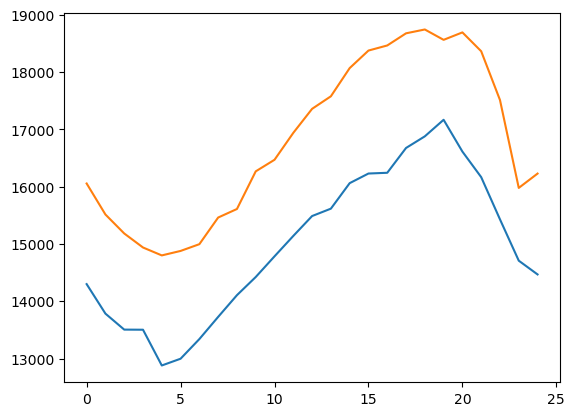

In [440]:
start_index = 0
end_index = 24

start_date = "2021-01-01 01:00:00"
end_date = "2021-01-02 01:00:00"

# Extract the subset of data
subset_1 = output_df.loc[start_index:end_index, 'Output']
subset_2 = d_2021.loc[start_date:end_date, 'Market Demand']

# Reset the index to range [0, 23]
subset_1.index = range(25)
subset_2.index = range(25)

# Plot the subset of data
subset_1.plot()
subset_2.plot()
plt.show()

Very cool!

All that is left is to save "Price", "Demand", "Output", and "Capability" in a new DataFrame. We shall call it "df_ieso_cleaned" and then save it as a CSV file.

In [441]:
# a quick review
d_2021.head()

,Market Demand,Ontario Demand
datetime_data,,
2021-01-01 01:00:00,16057,14112
2021-01-01 02:00:00,15516,13504
2021-01-01 03:00:00,15185,13155
2021-01-01 04:00:00,14940,12892
2021-01-01 05:00:00,14802,12798


In [451]:
# a quick review
pr_2021.head()

,HOEP
datetime_data,
2021-01-01 01:00:00,31.74
2021-01-01 02:00:00,17.61
2021-01-01 03:00:00,14.36
2021-01-01 04:00:00,10.26
2021-01-01 05:00:00,6.03


In [452]:
# a quick review
output_df.head()

,Date,Hour,Output
0,2021-01-01,01,14301.0
1,2021-01-01,02,13786.0
2,2021-01-01,03,13507.0
3,2021-01-01,04,13505.0
4,2021-01-01,05,12881.0


In [459]:
# a quick review
output_df.shape

(8760, 3)

In [449]:
Cap_df.head()

,Date,Hour,Output,capability
0,2021-01-01,01,NaN,26203.0
1,2021-01-01,02,NaN,26494.0
2,2021-01-01,03,NaN,26587.0
3,2021-01-01,04,NaN,26749.0
4,2021-01-01,05,NaN,26843.0


In [453]:
# a qick review
Cap_df.describe()

,capability
count,8760.000000
mean,27592.664612
std,1740.463935
min,22382.000000
25%,26463.000000
50%,27702.500000
75%,28726.000000
max,32072.000000


it all checks out! We are ready for the final step :-)

In [489]:
# we shall create a new df
df_ieso_cleaned = pd.DataFrame()

### Concatenation process

In [490]:
df_ieso_cleaned = pd.concat([d_2021,pr_2021['HOEP']],axis=1)

In [492]:
# sanity check
df_ieso_cleaned.head()

,Market Demand,Ontario Demand,HOEP
datetime_data,,,
2021-01-01 01:00:00,16057,14112,31.74
2021-01-01 02:00:00,15516,13504,17.61
2021-01-01 03:00:00,15185,13155,14.36
2021-01-01 04:00:00,14940,12892,10.26
2021-01-01 05:00:00,14802,12798,6.03


In [493]:
# sanity check
df_ieso_cleaned.shape

(8760, 3)

In [494]:
df_ieso_cleaned.describe()

,Market Demand,Ontario Demand,HOEP
count,8760.000000,8760.000000,8760.000000
mean,17192.678082,15279.019406,26.747627
std,2200.862573,2303.635847,31.228770
min,12569.000000,10426.000000,-3.940000
25%,15542.000000,13592.750000,10.950000
50%,16936.000000,15116.000000,24.050000
75%,18657.500000,16780.250000,38.670000
max,24609.000000,22986.000000,1660.800000


In [495]:
df_ieso_cleaned['Date Time'] = df_ieso_cleaned.index

df_ieso_cleaned.reset_index(drop=True, inplace=True)

In [496]:
df_ieso_cleaned.head()

,Market Demand,Ontario Demand,HOEP,Date Time
0,16057,14112,31.74,2021-01-01 01:00:00
1,15516,13504,17.61,2021-01-01 02:00:00
2,15185,13155,14.36,2021-01-01 03:00:00
3,14940,12892,10.26,2021-01-01 04:00:00
4,14802,12798,6.03,2021-01-01 05:00:00


Very cool. Now let'schange the order in which these columns appear.

In [497]:
# Reorder the columns
df_ieso_cleaned = df_ieso_cleaned[['Date Time'] + [col for col in df_ieso_cleaned.columns if col != 'Date Time']]

In [498]:
df_ieso_cleaned.head()

,Date Time,Market Demand,Ontario Demand,HOEP
0,2021-01-01 01:00:00,16057,14112,31.74
1,2021-01-01 02:00:00,15516,13504,17.61
2,2021-01-01 03:00:00,15185,13155,14.36
3,2021-01-01 04:00:00,14940,12892,10.26
4,2021-01-01 05:00:00,14802,12798,6.03


All is well.

In [499]:
df_ieso_cleaned = pd.concat([df_ieso_cleaned, output_df['Output']],axis=1)

In [500]:
df_ieso_cleaned.head()

,Date Time,Market Demand,Ontario Demand,HOEP,Output
0,2021-01-01 01:00:00,16057,14112,31.74,14301.0
1,2021-01-01 02:00:00,15516,13504,17.61,13786.0
2,2021-01-01 03:00:00,15185,13155,14.36,13507.0
3,2021-01-01 04:00:00,14940,12892,10.26,13505.0
4,2021-01-01 05:00:00,14802,12798,6.03,12881.0


In [501]:
df_ieso_cleaned.shape

(8760, 5)

In [504]:
Cap_df.columns

Index(['Date', 'Hour', 'Output', 'capability'], dtype='object')

In [505]:
df_ieso_cleaned = pd.concat([df_ieso_cleaned,Cap_df['capability']],axis=1)

In [506]:
# sanity check 
df_ieso_cleaned.head()

,Date Time,Market Demand,Ontario Demand,HOEP,Output,capability
0,2021-01-01 01:00:00,16057,14112,31.74,14301.0,26203.0
1,2021-01-01 02:00:00,15516,13504,17.61,13786.0,26494.0
2,2021-01-01 03:00:00,15185,13155,14.36,13507.0,26587.0
3,2021-01-01 04:00:00,14940,12892,10.26,13505.0,26749.0
4,2021-01-01 05:00:00,14802,12798,6.03,12881.0,26843.0


In [507]:
df_ieso_cleaned.describe()

,Date Time,Market Demand,Ontario Demand,HOEP,Output,capability
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2021-07-02 11:30:00,17192.678082,15279.019406,26.747627,16196.016210,27592.664612
min,2021-01-01 00:00:00,12569.000000,10426.000000,-3.940000,11771.000000,22382.000000
25%,2021-04-02 05:45:00,15542.000000,13592.750000,10.950000,14762.750000,26463.000000
50%,2021-07-02 11:30:00,16936.000000,15116.000000,24.050000,15954.500000,27702.500000
75%,2021-10-01 17:15:00,18657.500000,16780.250000,38.670000,17384.250000,28726.000000
max,2021-12-31 23:00:00,24609.000000,22986.000000,1660.800000,22507.000000,32072.000000
std,NaN,2200.862573,2303.635847,31.228770,1911.668516,1740.463935


In [508]:
df_ieso_cleaned.dtypes

Date Time         datetime64[ns]
Market Demand              int64
Ontario Demand             int64
HOEP                     float64
Output                   float64
capability               float64
dtype: object

I am delighted to announce that things have gone very well. And we have concluded our data cleaning.

Last but not least, we should save this dataframe as a CSV file, before we proceed to the next steps: Exploratory Data Analysis, Hypothesis formation, Hypothesis Testing, Principal Component Analysis, and Data Modelling.

In [509]:
df_ieso_cleaned.to_csv('df_ieso_cleaned_2021.csv')

Call it good ;-)

# This point downward is not to be included!

In [422]:
GOC_2021_02 = pd.read_csv('PUB_GenOutputCapabilityMonth_202102.csv',skiprows=3)

In [423]:
GOC_2021_02.shape

(11614, 28)

In [196]:
numbers = [f"{i:02d}" for i in range(1, 13)]

In [197]:
numbers

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

In [ ]:
GOC_dict = {}

months = [f"{i:02d}" for i in range(1, 13)]

for month in months:
    GOC_dict[month] = 

<hr>

For Capabilities. we will take the capability of Hydro and Nuclear and Gas, and add it to the 'Forecast' of wind and solar. The reason for this selection is that we want to eliminate the capability that is beyond reach (when sun is not shining), and understand how the humans navigate the uncertain landscape.

'Forecast' represents the value that the fallible human anticipates to be tenable. Thus, any deviation from it, should throw a wrench in the system.

By contrast, Available Capacity that is beyond reach, is clearly inconsequential to the market.

<hr>

In simpler words, when during a cold February evening around 18h00 the system is under pressure, it is under pressure because SOLAR source is unusable. Meaning, the Available capability which stands at 60 MWh is irrelevant; and thus, it must be eliminated from the data before it acts as a force pushing down the output/capacity ratio.